# Project 2: Marketing Analysis

## Import module

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import data

In [6]:
df = pd.read_excel('Ppc_campaign_performance_data.xlsx')

In [7]:
df.head()

,Campaign_ID,Budget,Clicks,CTR,CPC,Conversions,CPA,Conversion_Rate,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Revenue,Spend,ROAS,Date,Impressions
0,C3578,6390,401,0.0461,15.94,174,36.72,0.4339,20,Instagram,Carousel,35-44,Male,Europe,27840,6453.9,4.31,2025-01-19,8698
1,C6702,9870,1286,0.2860,7.67,821,12.02,0.6384,28,LinkedIn,Text,55+,Male,Africa,128076,10067.4,12.72,2025-01-22,4496
2,C9725,7700,1684,0.2122,4.57,1060,7.26,0.6295,15,Instagram,Video,35-44,Other,North America,193980,7623.0,25.45,2024-07-23,7935
3,C9472,8420,444,0.0961,18.96,308,27.34,0.6937,25,Google,Text,25-34,Male,North America,24024,8504.2,2.82,2024-04-20,4620
4,C7601,8470,1912,0.3652,4.43,1428,5.93,0.7469,9,Google,Text,25-34,Other,Europe,277032,8046.5,34.43,2024-08-07,5235


## Cleaning data

### Kiểm tra kiểu dữ liệu

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Clicks           1000 non-null   int64  
 3   CTR              1000 non-null   float64
 4   CPC              1000 non-null   float64
 5   Conversions      1000 non-null   int64  
 6   CPA              1000 non-null   float64
 7   Conversion_Rate  1000 non-null   float64
 8   Duration         1000 non-null   int64  
 9   Platform         1000 non-null   object 
 10  Content_Type     1000 non-null   object 
 11  Target_Age       1000 non-null   object 
 12  Target_Gender    1000 non-null   object 
 13  Region           1000 non-null   object 
 14  Revenue          1000 non-null   int64  
 15  Spend            1000 non-null   float64
 16  ROAS             1000 non-null   float64
 17  Date           

-> Không có giá trị null, kiểu dữ liệu tương đối chuẩn, có vẻ như dữ liệu đã được người cung cấp trước đó làm sạch.  
-> Ta sẽ đổi kiểu dữ liệu của Date sang datetime

In [9]:
df["Date"] = pd.to_datetime(df["Date"])

### Kiểm tra trùng lặp

In [10]:

df["Campaign_ID"].duplicated().sum()

np.int64(46)

Nhưng có thực sự là vậy không ? Ta cần chú ý đến liệu có phải rằng chiến dịch sẽ được thực hiện dở dang chưa hoàn thành nốt không ?

In [11]:
df["Campaign_ID"].value_counts()

Campaign_ID
C5910    3
C7706    2
C9240    2
C5390    2
C5468    2
        ..
C1713    1
C4177    1
C6019    1
C6358    1
C1412    1
Name: count, Length: 954, dtype: int64

In [12]:
df[df["Campaign_ID"] == "C5910"] 

,Campaign_ID,Budget,Clicks,CTR,CPC,Conversions,CPA,Conversion_Rate,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Revenue,Spend,ROAS,Date,Impressions
272,C5910,4310,577,0.1408,7.47,188,22.93,0.3258,7,Facebook,Carousel,18-24,Other,Africa,20868,4223.8,4.94,2024-08-15,4098
351,C5910,7760,1931,0.7453,4.02,1221,6.36,0.6323,29,YouTube,Image,18-24,Other,Europe,238095,8148.0,29.22,2024-06-29,2590
827,C5910,7160,293,0.2169,24.44,291,24.60,0.9932,17,LinkedIn,Video,55+,Other,Asia,49179,7374.8,6.67,2024-04-23,1350


-> Có vẻ cùng Campaign_ID thế nhưng thông tin chiến dịch lại khác nhau. Ta quyết định giữ lại tất cả các bản ghi vì có thể các chiến dịch này được tái khởi động lại vì một vài lý do nào đó (Có thể do thay đổi khu vực do tôi thấy Region có thay đổi, hoặc có thể là kiểm tra xem chiến dịch có còn hiệu quả không do tôi chiến dịch ở khoảng thời gian gần nhất thấy spend rất nhỏ giọt so với trước đó)

## Create new featuress

In [14]:
# Thêm một vài cột
df["Profit"] = df["Revenue"] - df["Spend"]
df["ROI"] = df["ROAS"] - 1

## Analyze data

### Phân tích tổng quan hiệu suất

1. Tình trạng tài chính tổng thể

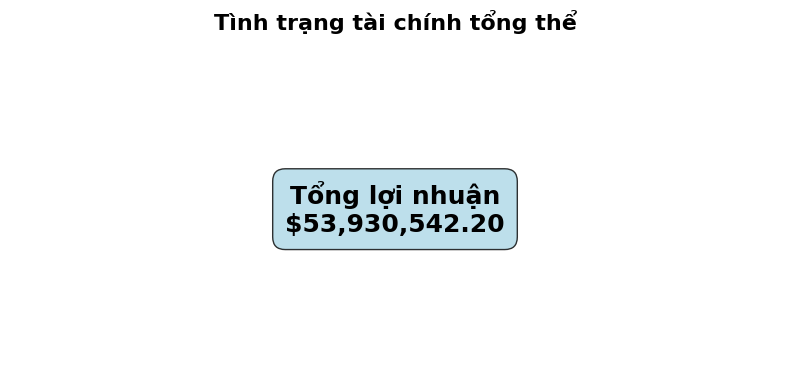

In [49]:
# Tổng lợi nhuận cho đến thời điểm hiện tại
total_profit = df["Profit"].sum()

fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, f'Tổng lợi nhuận\n${total_profit:,.2f}', 
    fontsize=18, fontweight='bold', ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Tình trạng tài chính tổng thể', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

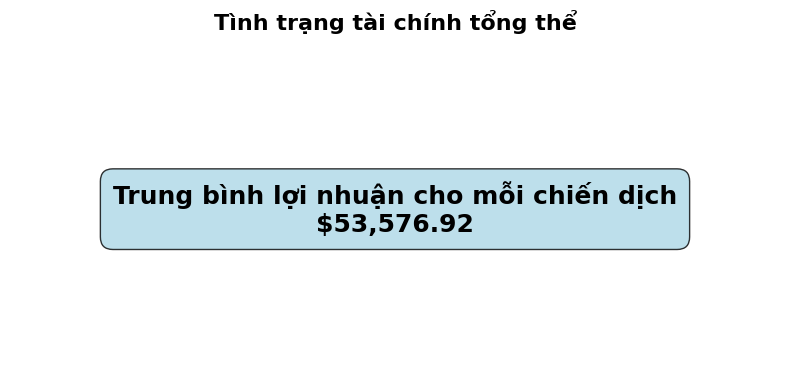

In [48]:
# Trung bình lợi nhuận thu được cho mỗi chiến dịch
avg_profit_per_campaign = df.groupby("Campaign_ID")["Profit"].mean().mean()

fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, f'Trung bình lợi nhuận cho mỗi chiến dịch\n${avg_profit_per_campaign:,.2f}', 
    fontsize=18, fontweight='bold', ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Tình trạng tài chính tổng thể', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


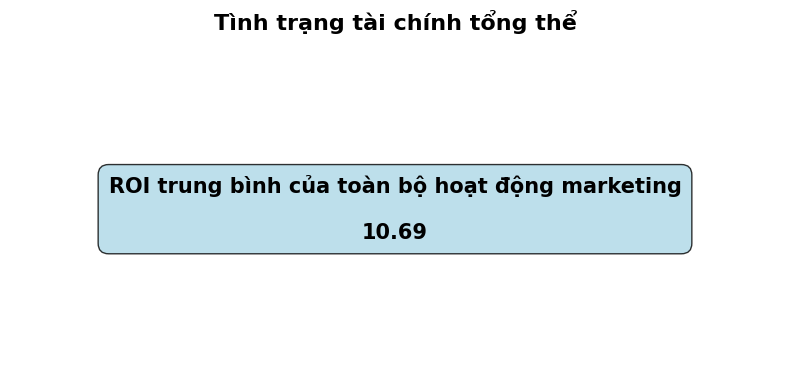

In [56]:
# ROI trung bình của toàn bộ hoạt động marketing
avg_roi = df["ROI"].mean()

fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.5, 0.5, f'ROI trung bình của toàn bộ hoạt động marketing\n\n{avg_roi:,.2f}', 
    fontsize=15, fontweight='bold', ha='center', va='center',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.title('Tình trạng tài chính tổng thể', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()
